In [5]:
import umap.umap_ as umap
import pacmap
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os

In [17]:
def generate_umap_pacmap_3d(data, label_column):
    
    # Separate features and labels
    features = data.drop(columns=[label_column])
    labels = data[label_column]
    
    # UMAP embedding 2D
    umap_2d = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', n_components=2)
    umap_embedding_2d = umap_2d.fit_transform(features)
    
    
    umap_3d = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', n_components=3)
    umap_embedding_3d = umap_3d.fit_transform(features)
    
    pacmap_2d = pacmap.PaCMAP(n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0, n_components=2)
    pacmap_embedding_2d = pacmap_2d.fit_transform(features.values)
    
    pacmap_3d = pacmap.PaCMAP(n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0, n_components=3)
    pacmap_embedding_3d = pacmap_3d.fit_transform(features.values)
    
    # Color palette
    unique_labels = labels.unique()
    palette = sns.color_palette("tab10", len(unique_labels))
    color_map = dict(zip(unique_labels, palette))
    colors = labels.map(color_map)
    
    # Plot UMAP 2D
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(umap_embedding_2d[:, 0], umap_embedding_2d[:, 1], c=colors, s=10, alpha=0.25)  # Increased transparency
    plt.title('UMAP 2D Projection')
    plt.colorbar(scatter, ticks=range(len(unique_labels)), format=plt.FuncFormatter(lambda i, _: unique_labels[i]))
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.grid(True)
    
    # Plot PaCMAP 2D
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(pacmap_embedding_2d[:, 0], pacmap_embedding_2d[:, 1], c=colors, s=10, alpha=0.25)  # Increased transparency
    plt.title('PaCMAP 2D Projection')
    plt.colorbar(scatter, ticks=range(len(unique_labels)), format=plt.FuncFormatter(lambda i, _: unique_labels[i]))
    plt.xlabel('PaCMAP 1')
    plt.ylabel('PaCMAP 2')
    plt.grid(True)
    plt.show()
    
    # Plot UMAP 3D
    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(121, projection='3d')
    scatter = ax.scatter(umap_embedding_3d[:, 0], umap_embedding_3d[:, 1], umap_embedding_3d[:, 2], c=colors, s=2, alpha=0.1)  # Increased transparency
    ax.set_title('UMAP 3D Projection')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_zlabel('UMAP 3')
    fig.colorbar(scatter, ax=ax, ticks=range(len(unique_labels)), format=plt.FuncFormatter(lambda i, _: unique_labels[i]), pad=0.1)
    ax.grid(True)
    
    # Plot PaCMAP 3D
    ax = fig.add_subplot(122, projection='3d')
    scatter = ax.scatter(pacmap_embedding_3d[:, 0], pacmap_embedding_3d[:, 1], pacmap_embedding_3d[:, 2], c=colors, s=2, alpha=0.1)  # Increased transparency
    ax.set_title('PaCMAP 3D Projection')
    ax.set_xlabel('PaCMAP 1')
    ax.set_ylabel('PaCMAP 2')
    ax.set_zlabel('PaCMAP 3')
    fig.colorbar(scatter, ax=ax, ticks=range(len(unique_labels)), format=plt.FuncFormatter(lambda i, _: unique_labels[i]), pad=0.1)
    ax.grid(True)
    plt.show()


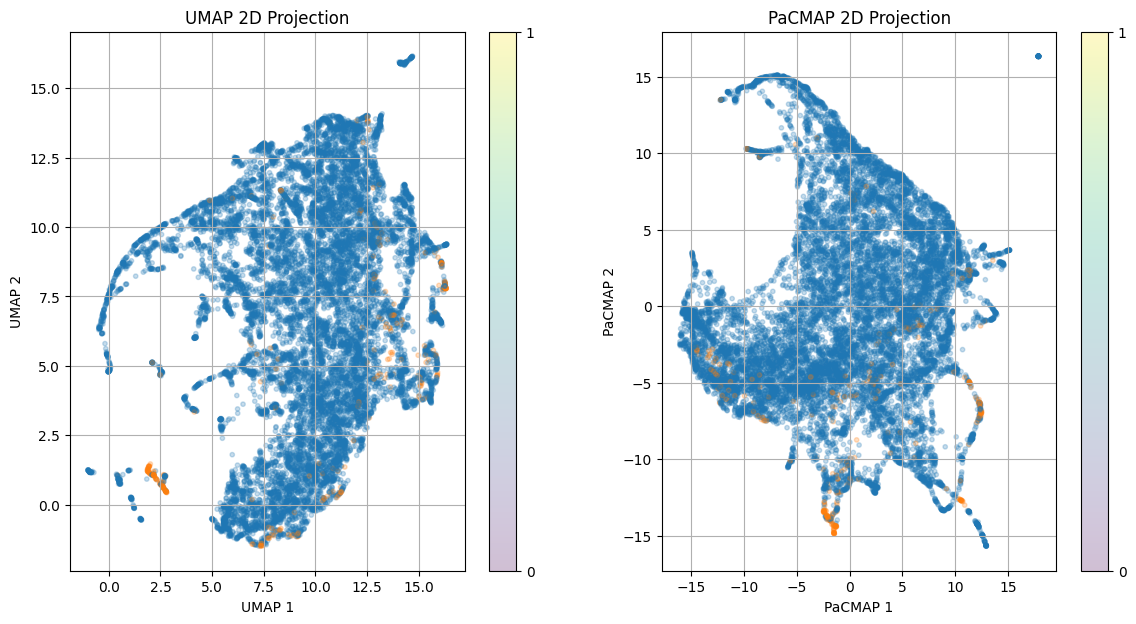

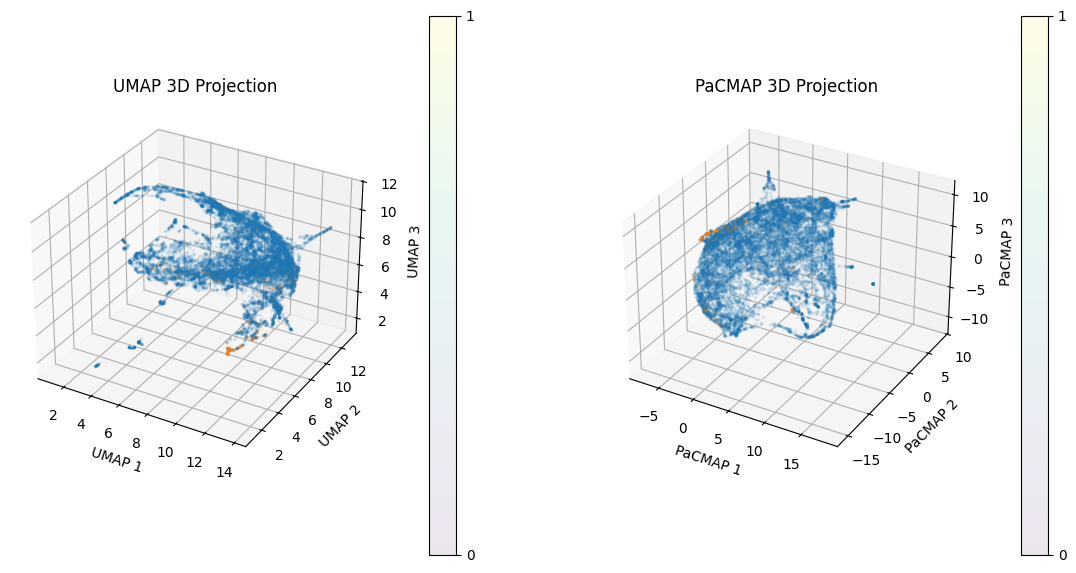

In [19]:
df = pd.read_excel("C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\Processed Datasets\\AE_PCA.xlsx")
generate_umap_pacmap_3d(df, 'LABEL')

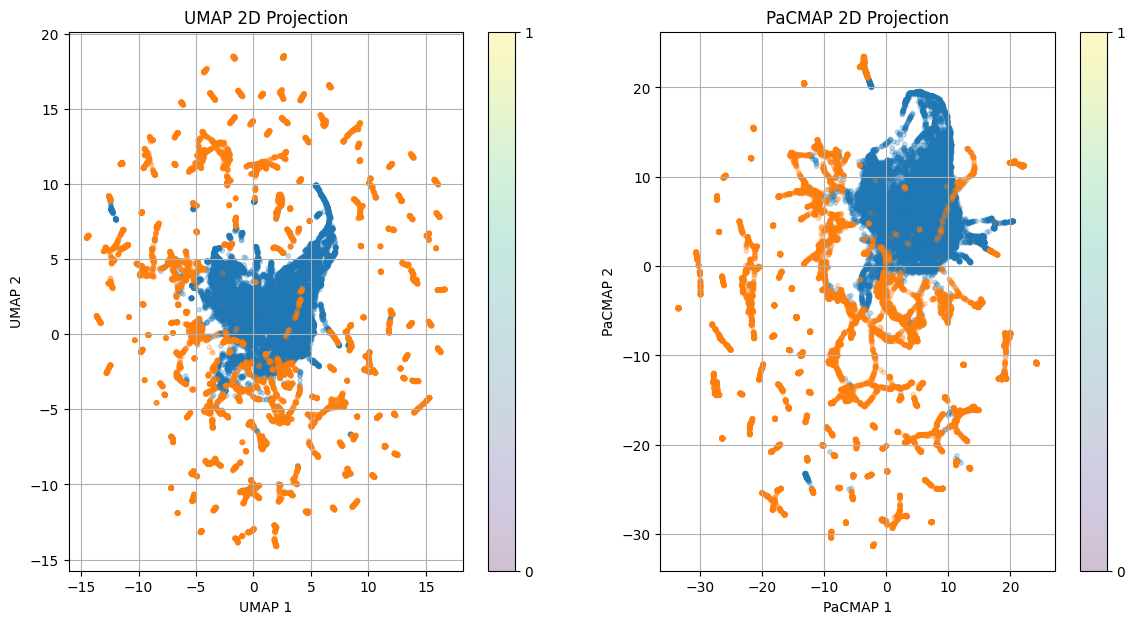

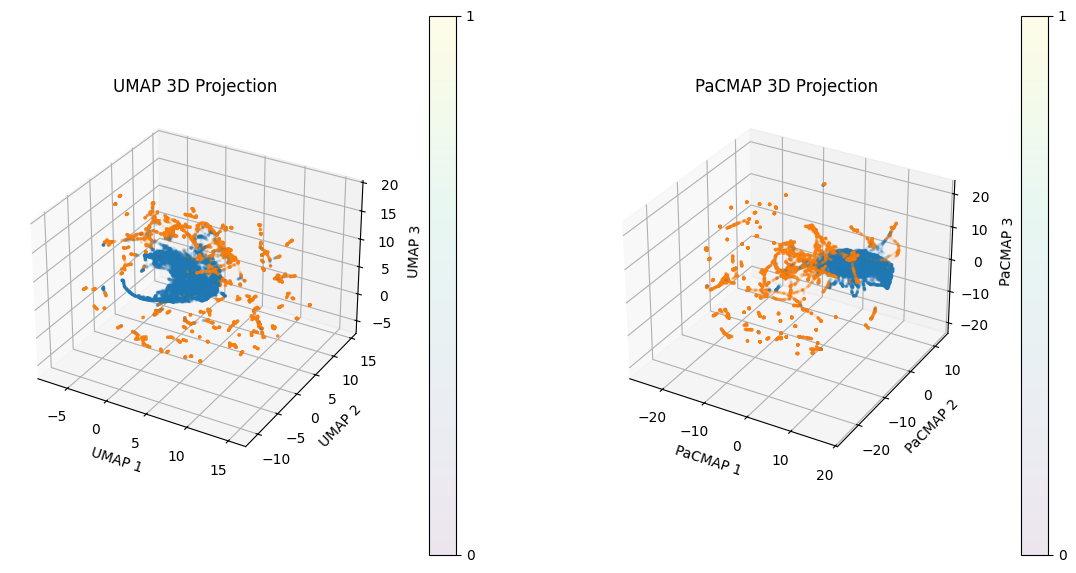

In [20]:
df = pd.read_excel("C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\Processed Datasets\\SVMSMOTE_MICE_RF_3_PCA.xlsx")
generate_umap_pacmap_3d(df, 'LABEL')

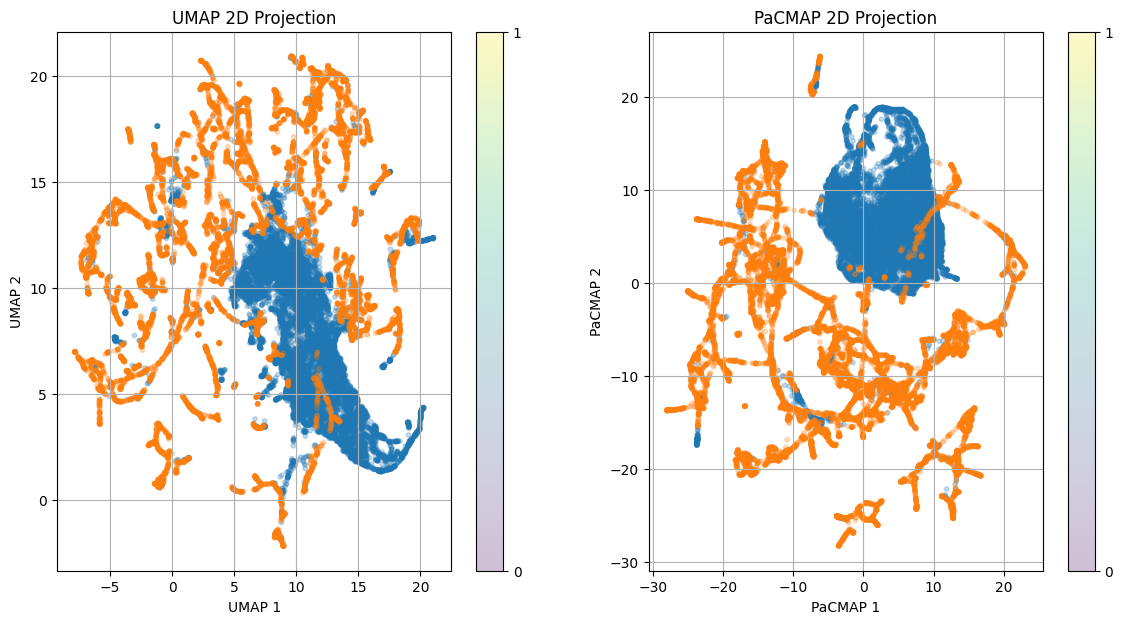

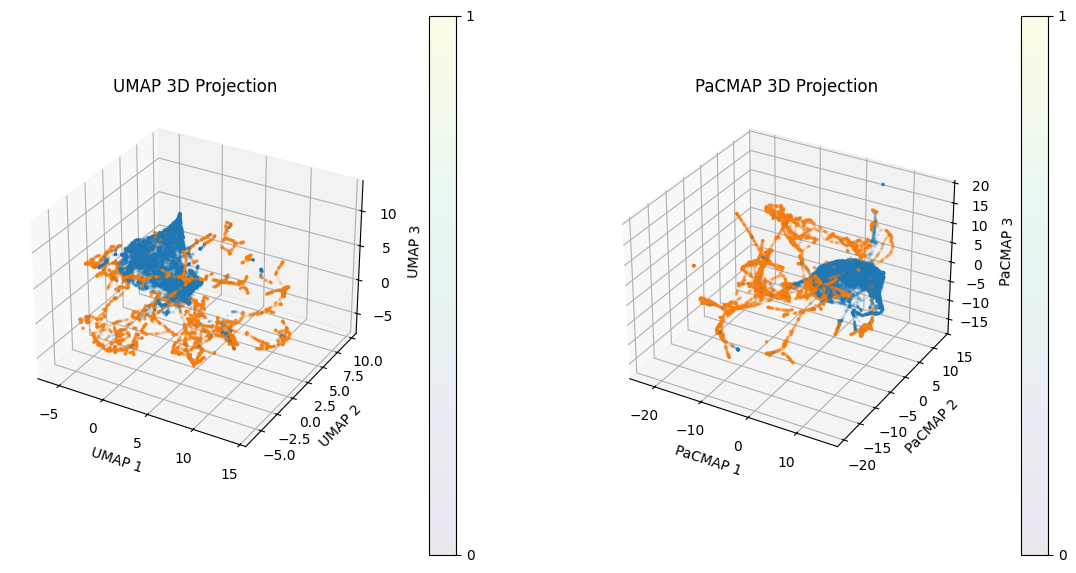

In [21]:
df = pd.read_excel("C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\Processed Datasets\\ADASYN_MICE_RF_3_PCA.xlsx")
generate_umap_pacmap_3d(df, 'LABEL')

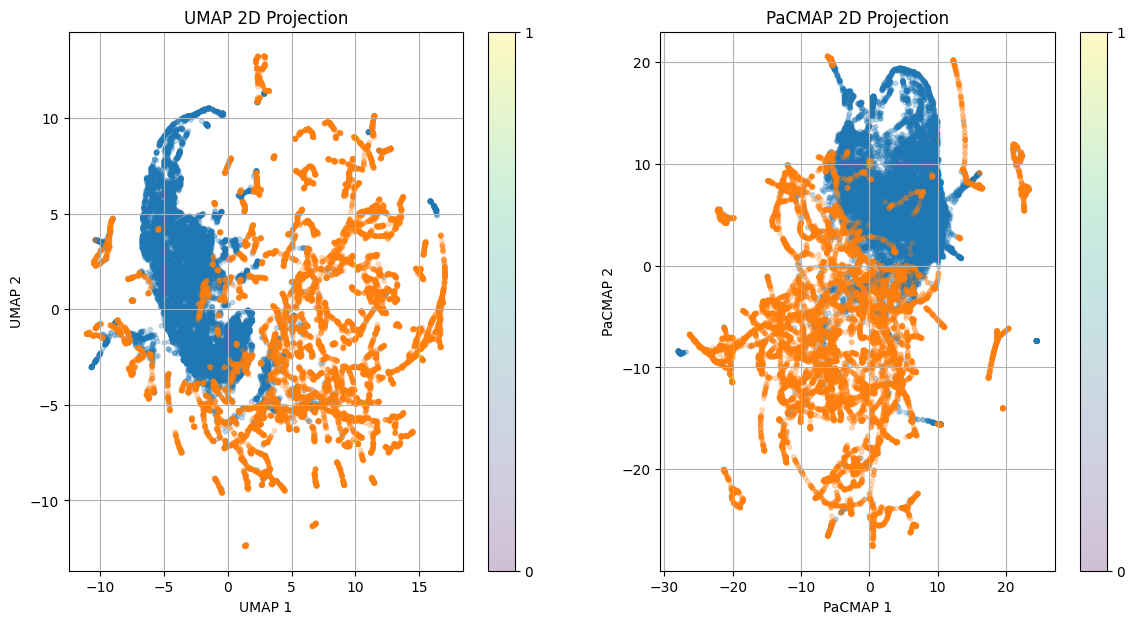

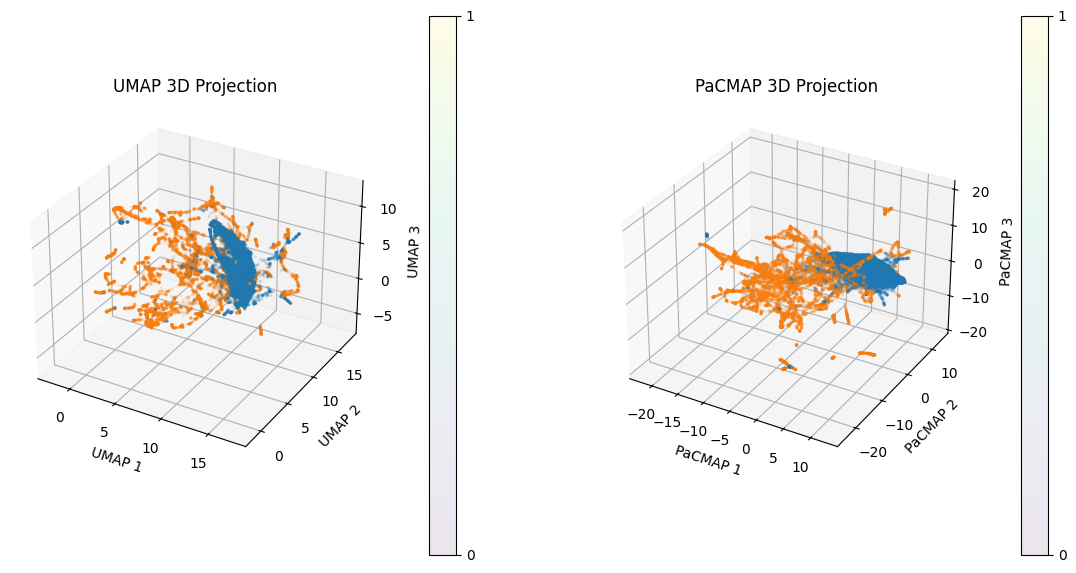

In [18]:
df = pd.read_excel("C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\Processed Datasets\\KMSMOTE_MICE_RF_3_PCA.xlsx")
generate_umap_pacmap_3d(df, 'LABEL')

In [8]:

def generate_umap_pacmap_3d(data, label_column, title):
    
    # Separate features and labels
    features = data.drop(columns=[label_column])
    labels = data[label_column]
    
    # UMAP embedding 2D
    umap_2d = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', n_components=2)
    umap_embedding_2d = umap_2d.fit_transform(features)
    
    # UMAP embedding 3D
    umap_3d = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', n_components=3)
    umap_embedding_3d = umap_3d.fit_transform(features)
    
    # PaCMAP embedding 2D
    pacmap_2d = pacmap.PaCMAP(n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0, n_components=2)
    pacmap_embedding_2d = pacmap_2d.fit_transform(features.values)
    
    # PaCMAP embedding 3D
    pacmap_3d = pacmap.PaCMAP(n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0, n_components=3)
    pacmap_embedding_3d = pacmap_3d.fit_transform(features.values)
    
    # Color palette
    unique_labels = labels.unique()
    palette = sns.color_palette("tab10", len(unique_labels))
    color_map = dict(zip(unique_labels, palette))
    colors = labels.map(color_map)
    
    # saving images 
    if not os.path.exists("C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\PaCMAP graphs"):
        os.makedirs("C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\PaCMAP graphs")
    
    # Plot and save PaCMAP 2D
    plt.figure(figsize=(7, 7))
    scatter = plt.scatter(pacmap_embedding_2d[:, 0], pacmap_embedding_2d[:, 1], c=colors, s=10, alpha=0.25)
    plt.title(f'{title} - PaCMAP 2D Projection')
    plt.colorbar(scatter, ticks=range(len(unique_labels)), format=plt.FuncFormatter(lambda i, _: unique_labels[i]))
    plt.xlabel('PaCMAP 1')
    plt.ylabel('PaCMAP 2')
    plt.grid(True)
    plt.savefig(os.path.join("C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\PaCMAP graphs", f"{title}_PaCMAP_2D.png"), dpi=600, bbox_inches='tight')
    plt.show()
    
    # Plot and save PaCMAP 3D
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(pacmap_embedding_3d[:, 0], pacmap_embedding_3d[:, 1], pacmap_embedding_3d[:, 2], c=colors, s=2, alpha=0.1)
    ax.set_title(f'{title} - PaCMAP 3D Projection')
    ax.set_xlabel('PaCMAP 1')
    ax.set_ylabel('PaCMAP 2')
    ax.set_zlabel('PaCMAP 3')
    fig.colorbar(scatter, ax=ax, ticks=range(len(unique_labels)), format=plt.FuncFormatter(lambda i, _: unique_labels[i]), pad=0.1)
    ax.grid(True)
    plt.savefig(os.path.join("C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\PaCMAP graphs", f"{title}_PaCMAP_3D.png"), dpi=600, bbox_inches='tight')
    plt.show()

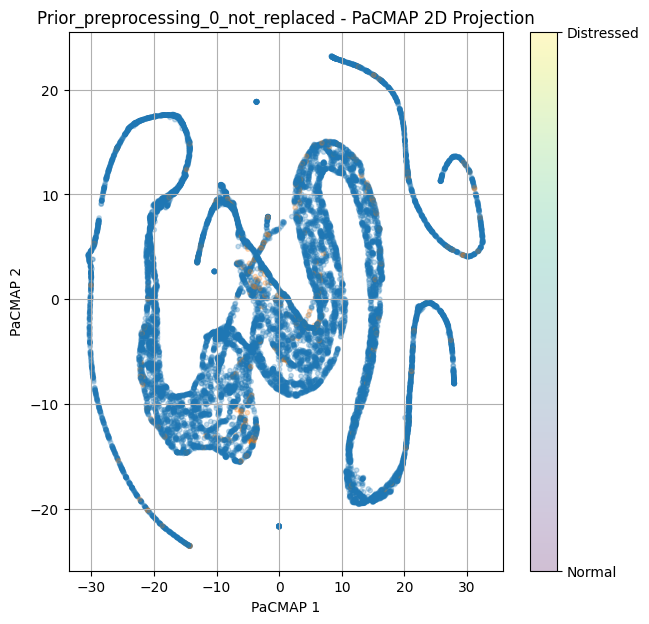

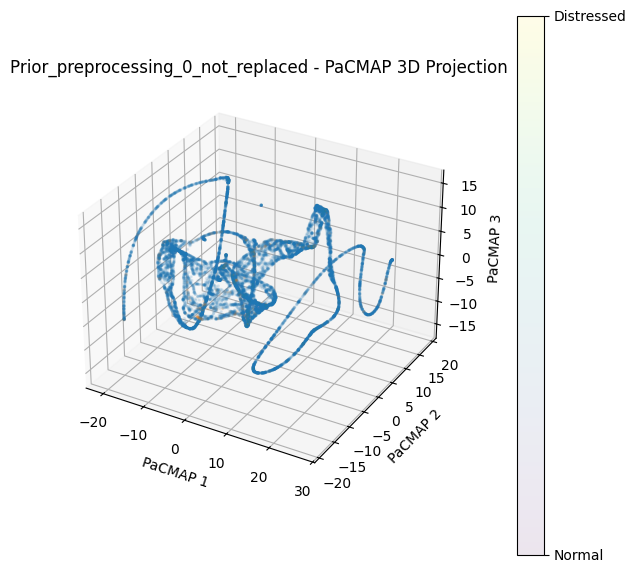

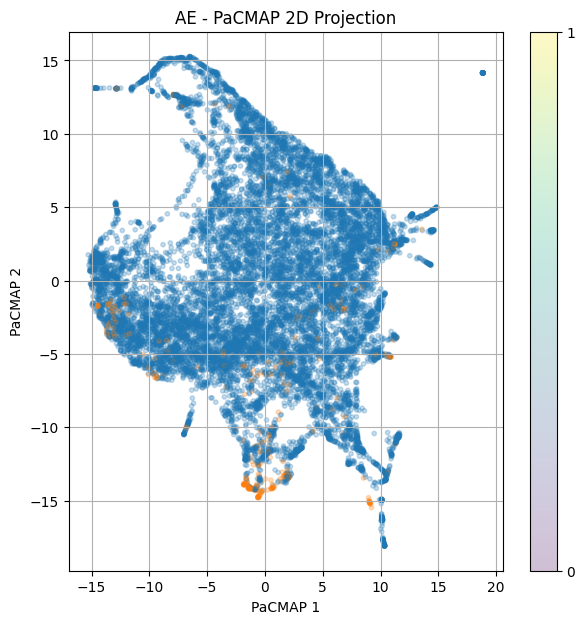

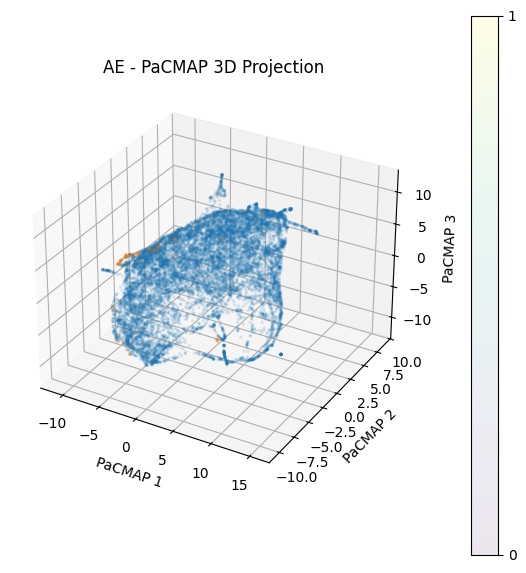

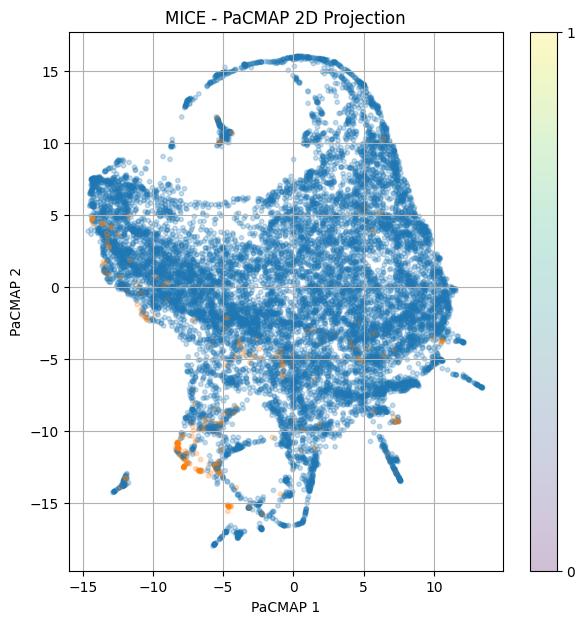

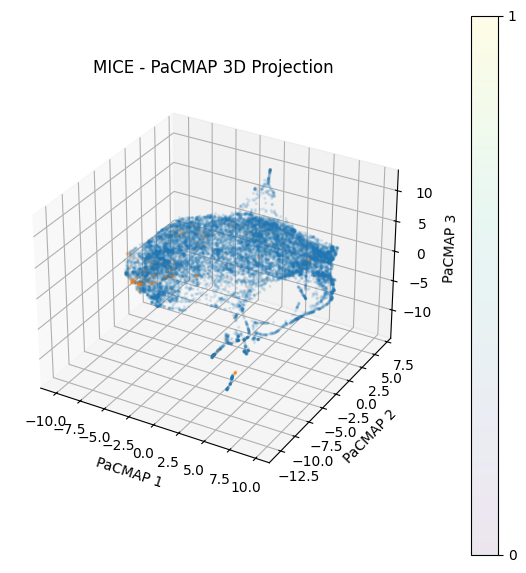

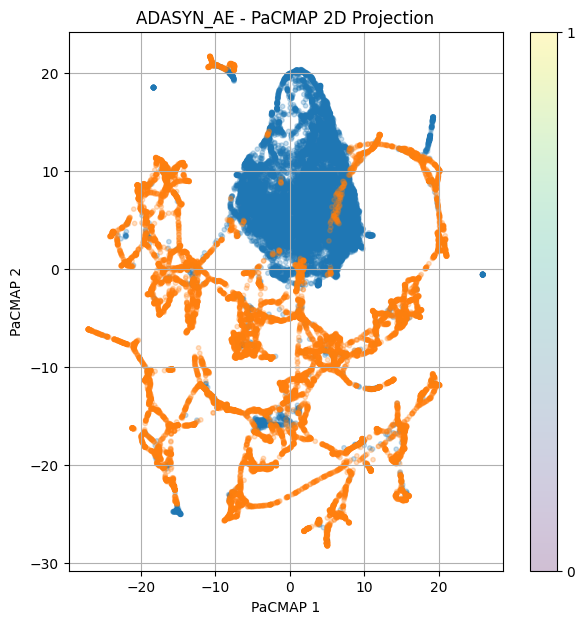

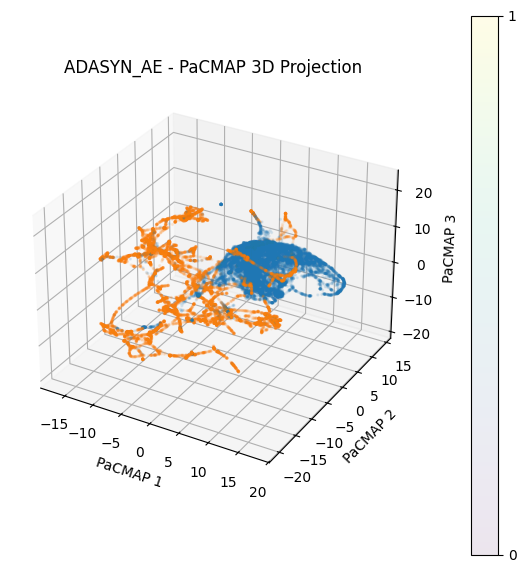

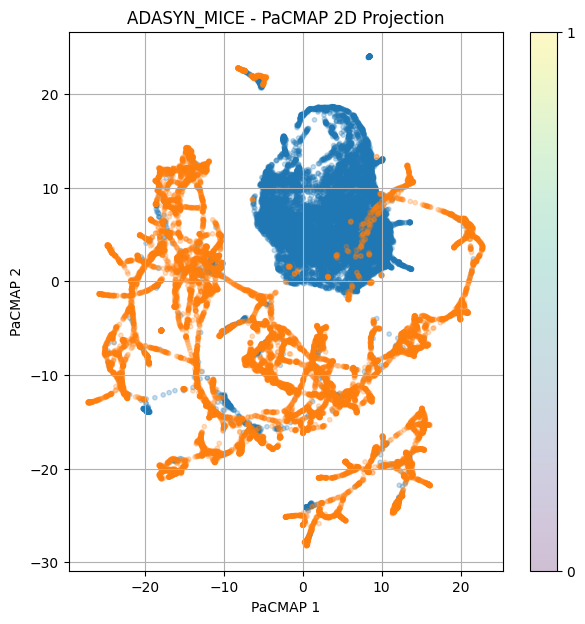

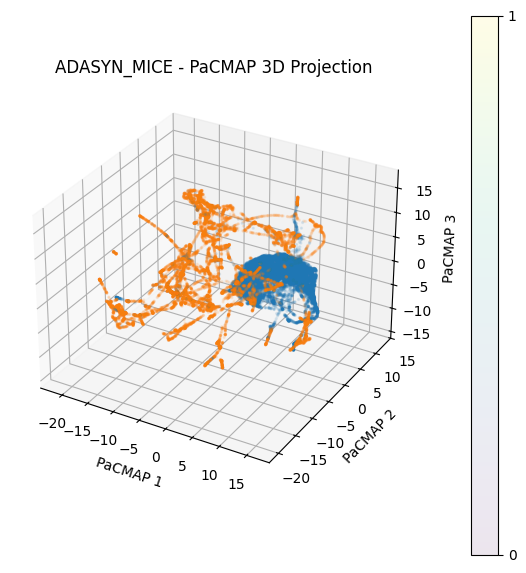

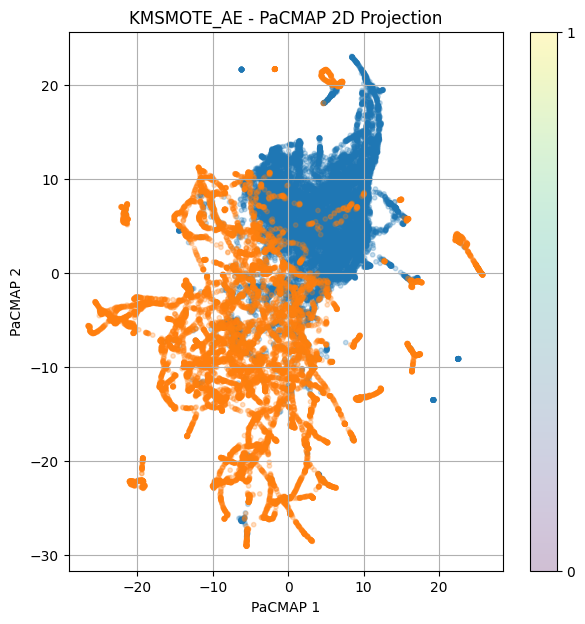

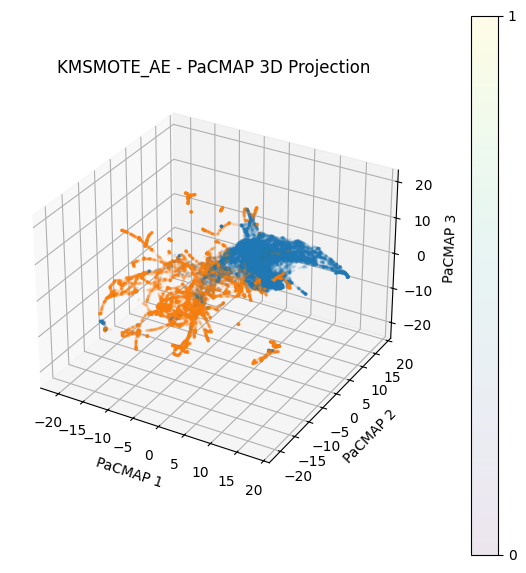

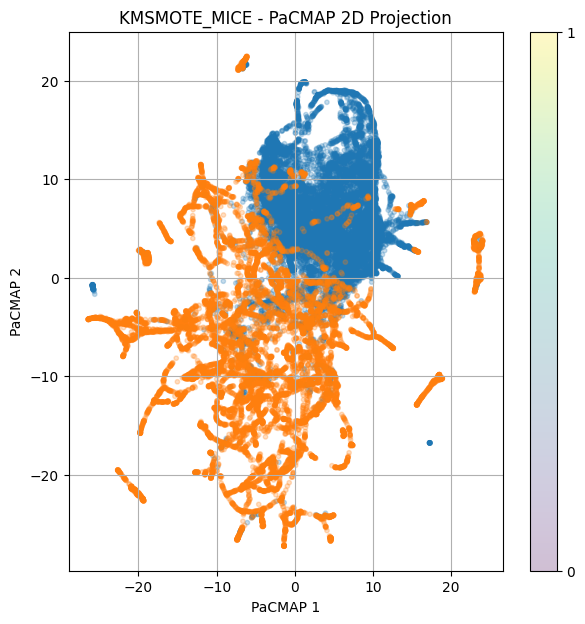

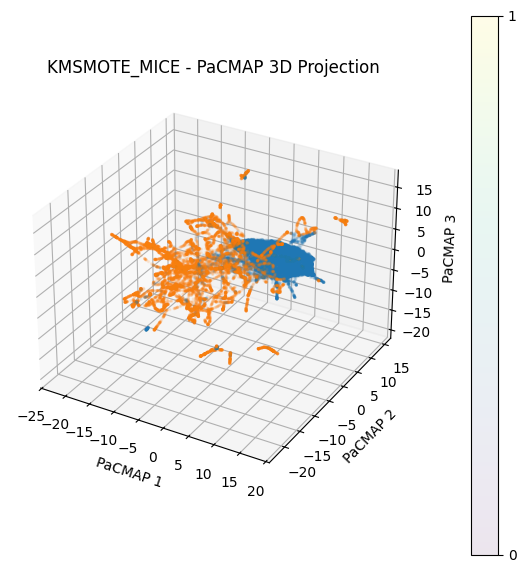

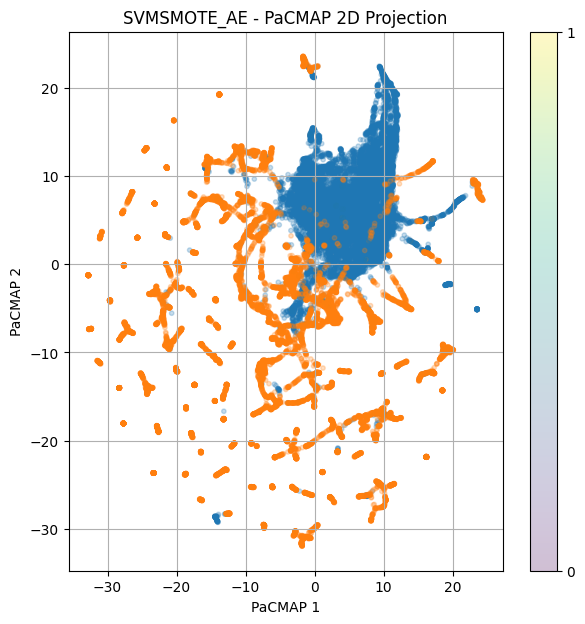

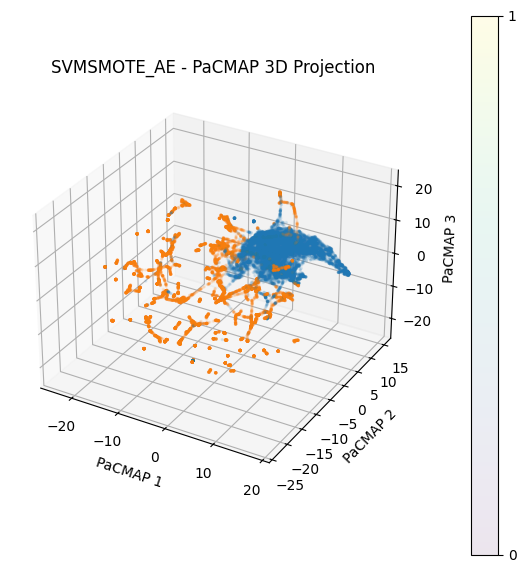

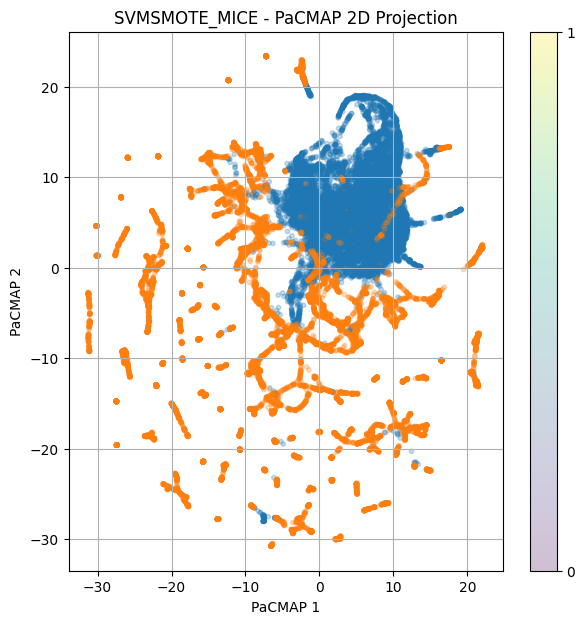

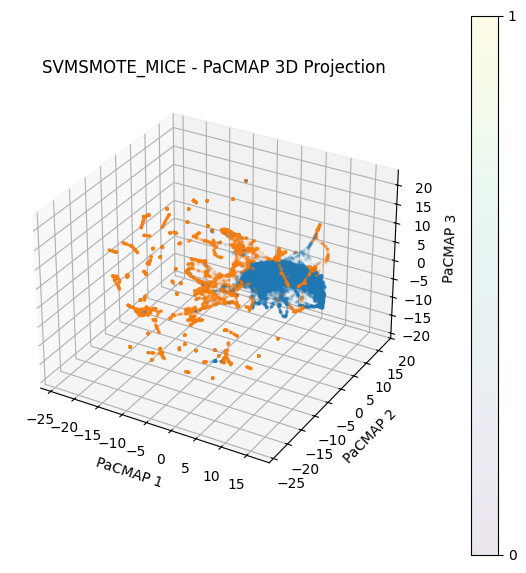

In [12]:
datasets = {
    "Prior_preprocessing_0_not_replaced" : "C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\Processed Datasets\\Prior_preprocessing_0_not_replaced.xlsx",
    "AE" : "C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\Processed Datasets\\AE_PCA.xlsx",
    "MICE" : "C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\Processed Datasets\\MICE_PCA.xlsx",
    "ADASYN_AE" : "C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\Processed Datasets\\ADASYN_AE_3_PCA.xlsx",
    "ADASYN_MICE" : "C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\Processed Datasets\\ADASYN_MICE_RF_3_PCA.xlsx",
    "KMSMOTE_AE" : "C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\Processed Datasets\\KMSMOTE_AE_3_PCA.xlsx",
    "KMSMOTE_MICE" : "C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\Processed Datasets\\KMSMOTE_MICE_RF_3_PCA.xlsx",
    "SVMSMOTE_AE" : "C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\Processed Datasets\\SVMSMOTE_AE_3_PCA.xlsx",
    "SVMSMOTE_MICE" : "C:\\Users\\dev\\Desktop\\MSC thesis\\Code\\final_codes\\Processed Datasets\\SVMSMOTE_MICE_RF_3_PCA.xlsx"
}

for k,v in datasets.items():
    df= pd.read_excel(v)
    generate_umap_pacmap_3d(df, "LABEL", k)